# Import Necessary Libraries and Load the Dataset

In [22]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Load the da'taset
file_path = "D:\data scientist\SPAM SMS DETECTION\spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataframe
df.head()
# Load the dataset
file_path = "D:\data scientist\SPAM SMS DETECTION\spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataframe
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing

In [24]:
# Drop irrelevant columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'message']

# Function to preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the preprocessing function to the message column using .loc to avoid the SettingWithCopyWarning
df['message'] = df['message'].apply(preprocess_text)

# Check for missing values
df.isnull().sum()


label      0
message    0
dtype: int64

#  Data Visualization - Distribution of Labels

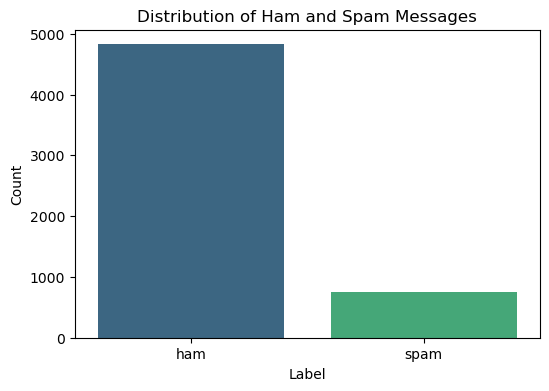

In [26]:
# Plot the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


# Split the Dataset into Training and Testing Sets

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4457,), (1115,), (4457,), (1115,))

# Feature Extraction using TF-IDF

In [28]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, transform the testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data
X_train_tfidf.shape, X_test_tfidf.shape


((4457, 8121), (1115, 8121))

# Train and Evaluate Naive Bayes Classifier

In [29]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classifier
Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



#  Train and Evaluate Logistic Regression Classifier

In [30]:
# Initialize and train the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Classifier
Accuracy: 0.9506726457399103
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.98      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



# Train and Evaluate Support Vector Machine (SVM) Classifier

In [31]:
# Initialize and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classifier
Accuracy: 0.9748878923766816
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



# Visualize the Confusion Matrix with a Heatmap

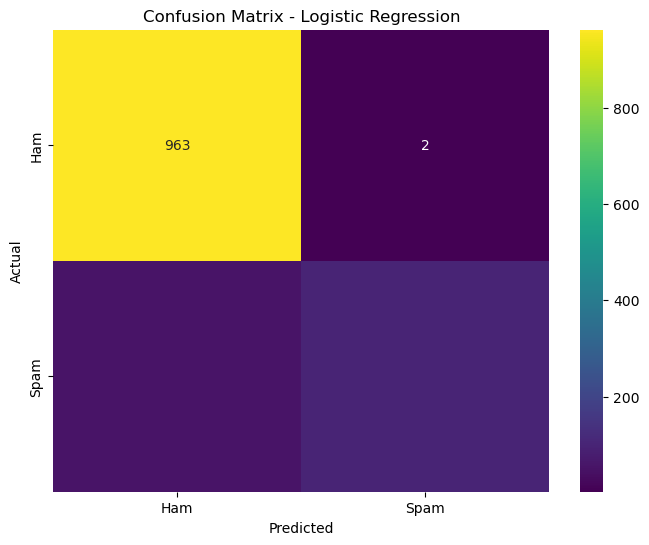

In [32]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the best-performing model (change to the one you prefer)
conf_mat = confusion_matrix(y_test, y_pred_lr)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
